# Analyzing the Metro de Santiago
#### First required some packages

In [1]:
import requests
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import geocoder
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Matplotlib and associated plotting modules

import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library
import matplotlib.pyplot as plt

## Getting the list of metro stations from wikipedia

In [2]:
url='https://es.wikipedia.org/wiki/Anexo:Estaciones_del_Metro_de_Santiago'
# get the page info using BeautifulSoup
soup = BeautifulSoup(requests.get(url).text,'html')


In [3]:
# get the table 
tabla=soup.find('table', {"class":"wikitable sortable"})

In [4]:
col1=[]
col2=[]
col3=[]
colf=[]


for row in tabla.findAll("tr"):
    cells=row.findAll("td")
    if len(cells)==9:
        col1.append(cells[1].text.rstrip())
        col2.append(cells[5].text.rstrip().split()[0])
        col3.append(cells[7].findAll("code"))
        colf.append(cells[2].text.rstrip().split()[-1])
    

## Getting the coordinates for each station

In [5]:
address = 'Santiago, Chile'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Santiago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Santiago are -33.4377756, -70.6504502.


In [6]:
lat=[]
long=[]

for i in col1:
    auxloc=geolocator.geocode(str(i)+', Santiago, Chile')
    try:
        lat.append(auxloc.latitude)
        long.append(auxloc.longitude)
    except:
        lat.append('nan')
        long.append('nan')        

In [7]:
local=dict([(x,0) for x in ['Metro','Latitud','Longitud','Fecha','Distancia']])
local['Metro']=col1
local['Latitud']=lat
local['Longitud']=long
local['Fecha']=colf
local['Distancia']=col2

df_local=pd.DataFrame(local)
df_local.head(5)

,Metro,Latitud,Longitud,Fecha,Distancia
0,San Pablo,-33.4443,-70.7232,1975,Terminal
1,Neptuno,-33.4515,-70.7226,1975,0690
2,Pajaritos,-33.4575,-70.7155,1975,1030
3,Las Rejas,-33.4576,-70.7068,1975,0860
4,Ecuador,-33.456,-70.6997,1975,0520


In [8]:
# Change from string to numeric the columns Distancia, Latitud y Longitud

df_local['Distancia'] = pd.to_numeric(df_local['Distancia'], errors='coerce')
df_local['Latitud'] = pd.to_numeric(df_local['Latitud'], errors='coerce')
df_local['Longitud'] = pd.to_numeric(df_local['Longitud'], errors='coerce')

In [9]:
#We select the radio for Foursquare search as quarter of the mean distance between stations

a=df_local['Distancia'].mean()/4.0
print(a)

260.1470588235294


In [10]:
# Drop the rows with Not a Number in the column Longitud 

df_local.dropna(subset=['Longitud'], inplace=True)

In [11]:
# Drop the stations that still are no open

df_local.drop(index=df_local.index[ df_local['Fecha'] == '0582023'], inplace=True)

### Metro stations Map

In [12]:
map_STGO = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for latitud, longitud, zona in zip(df_local['Latitud'], df_local['Longitud'], df_local['Metro']):
    label = '{}'.format(zona)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitud, longitud],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_STGO)  
    
map_STGO 

###  In the map, It is checked that some stations are misplaced, then it is corrected manually

In [13]:
# We get this coordinates from wikipedia

df_local.loc[ df_local['Metro'] == 'Pudahuel','Longitud']=-70.741053
df_local.loc[ df_local['Metro'] == 'Pudahuel','Latitud']=-33.444942

df_local.loc[ df_local['Metro'] == 'Estación Central','Longitud']=-70.679
df_local.loc[ df_local['Metro'] == 'Estación Central','Latitud']=-33.450831

df_local.loc[ df_local['Metro'] == 'Pedro de Valdivia','Longitud']=-70.614483
df_local.loc[ df_local['Metro'] == 'Pedro de Valdivia','Latitud']=-33.425419

df_local.loc[ df_local['Metro'] == 'Parque O\'Higgins','Longitud']=-70.656772
df_local.loc[ df_local['Metro'] == 'Parque O\'Higgins','Latitud']=-33.461647

df_local.loc[ df_local['Metro'] == 'Lo Prado','Longitud']=-70.716828
df_local.loc[ df_local['Metro'] == 'Lo Prado','Latitud']=-33.443161

df_local.loc[ df_local['Metro'] == 'Conchalí','Longitud']=-70.669639
df_local.loc[ df_local['Metro'] == 'Conchalí','Latitud']=-33.397389

df_local.loc[ df_local['Metro'] == 'Ñuñoa','Longitud']=-70.604972
df_local.loc[ df_local['Metro'] == 'Ñuñoa','Latitud']=-33.454167

df_local.loc[ df_local['Metro'] == 'San Joaquín','Longitud']=-70.615972
df_local.loc[ df_local['Metro'] == 'San Joaquín','Latitud']=-33.499222

df_local.loc[ df_local['Metro'] == 'Macul','Longitud']=-70.590072
df_local.loc[ df_local['Metro'] == 'Macul','Latitud']=-33.509258

df_local.loc[ df_local['Metro'] == 'San Miguel','Longitud']=-70.6511
df_local.loc[ df_local['Metro'] == 'San Miguel','Latitud']=-33.4888

df_local.loc[ df_local['Metro'] == 'Cerrillos','Longitud']=-70.695549
df_local.loc[ df_local['Metro'] == 'Cerrillos','Latitud']=-33.483422

df_local.loc[ df_local['Metro'] == 'Quinta Normal','Longitud']=-70.680311
df_local.loc[ df_local['Metro'] == 'Quinta Normal','Latitud']=-33.440394 

df_local.loc[ df_local['Metro'] == 'San Ramón','Longitud']=-70.643272
df_local.loc[ df_local['Metro'] == 'San Ramón','Latitud']=-33.541169

df_local.loc[ df_local['Metro'] == 'La Cisterna','Longitud']=-70.664397
df_local.loc[ df_local['Metro'] == 'La Cisterna','Latitud']=-33.537378

df_local.loc[ df_local['Metro'] == 'La Granja','Longitud']=-70.616111
df_local.loc[ df_local['Metro'] == 'La Granja','Latitud']=-33.541111



###  In the map

In [18]:
map_STGO = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for latitud, longitud, zona in zip(df_local['Latitud'], df_local['Longitud'], df_local['Metro']):
    label = '{}'.format(zona)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitud, longitud],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_STGO)  
    
map_STGO

## My credentials to use Foursquare

In [15]:
CLIENT_ID = 'L31KL3NI05XESARMV25LFRTNJMHJIPEZ0NPFBTMQMMXHMTWR' # your Foursquare ID
CLIENT_SECRET = 'OUATITFZ4JMKXTJ3JWNRBDUPWPFUTI4RZJNNHBGVV2CEXA1B' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: L31KL3NI05XESARMV25LFRTNJMHJIPEZ0NPFBTMQMMXHMTWR
CLIENT_SECRET:OUATITFZ4JMKXTJ3JWNRBDUPWPFUTI4RZJNNHBGVV2CEXA1B


In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=a):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Metro', 
                  'Metro Latitude', 
                  'Metro Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Getting the venues for all the Metro stations

In [21]:
STGO_venues = getNearbyVenues(names=df_local['Metro'],
                                   latitudes=df_local['Latitud'],
                                   longitudes=df_local['Longitud']
                                  )

San Pablo
Neptuno
Pajaritos
Las Rejas
Ecuador
San Alberto Hurtado
Universidad de Santiago
Estación Central
Unión Latinoamericana
República
Los Héroes
La Moneda
Universidad de Chile
Santa Lucía
Universidad Católica
Baquedano
Salvador
Manuel Montt
Pedro de Valdivia
Los Leones
Tobalaba
El Golf
Alcántara
Escuela Militar
Manquehue
Hernando de Magallanes
Los Dominicos
Vespucio Norte
Zapadores
Dorsal
Einstein
Cementerios
Cerro Blanco
Patronato
Puente Cal y Canto
Santa Ana
Los Héroes
Toesca
Parque O'Higgins
Rondizzoni
Franklin
El Llano
San Miguel
Lo Vial
Departamental
Ciudad del Niño
Lo Ovalle
El Parrón
La Cisterna
Los Libertadores
Cardenal Caro
Vivaceta
Conchalí
Plaza Chacabuco
Hospitales
Puente Cal y Canto
Plaza de Armas
Universidad de Chile
Parque Almagro
Matta
Irarrázaval
Monseñor Eyzaguirre
Ñuñoa
Chile España
Villa Frei
Plaza Egaña
Fernando Castillo Velasco
Tobalaba
Cristóbal Colón
Francisco Bilbao
Príncipe de Gales
Simón Bolívar
Plaza Egaña
Los Orientales
Grecia
Los Presidentes
Quilín
La

In [22]:
print(STGO_venues.shape)
STGO_venues.head()

(1901, 7)


,Metro,Metro Latitude,Metro Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,San Pablo,-33.444305,-70.723176,Zen Sushi Ya,-33.444410,-70.724894,Sushi Restaurant
1,San Pablo,-33.444305,-70.723176,Ahí Sushi,-33.443676,-70.723286,Sushi Restaurant
2,San Pablo,-33.444305,-70.723176,Spacio1,-33.444496,-70.723931,Convenience Store
3,San Pablo,-33.444305,-70.723176,Pollos Asados A Las Brasas Las Cañas,-33.443959,-70.723401,Wings Joint
4,San Pablo,-33.444305,-70.723176,China Popular,-33.444355,-70.724579,Chinese Restaurant


In [23]:
barra=STGO_venues.groupby('Metro').count()
barra

,Metro Latitude,Metro Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Metro,,,,,,
Alcántara,13,13,13,13,13,13
Baquedano,52,52,52,52,52,52
Barrancas,8,8,8,8,8,8
Bellas Artes,34,34,34,34,34,34
Bellavista de La Florida,31,31,31,31,31,31
...,...,...,...,...,...,...
Villa Frei,21,21,21,21,21,21
Vivaceta,4,4,4,4,4,4
Zapadores,5,5,5,5,5,5


In [24]:
graph=barra['Venue']

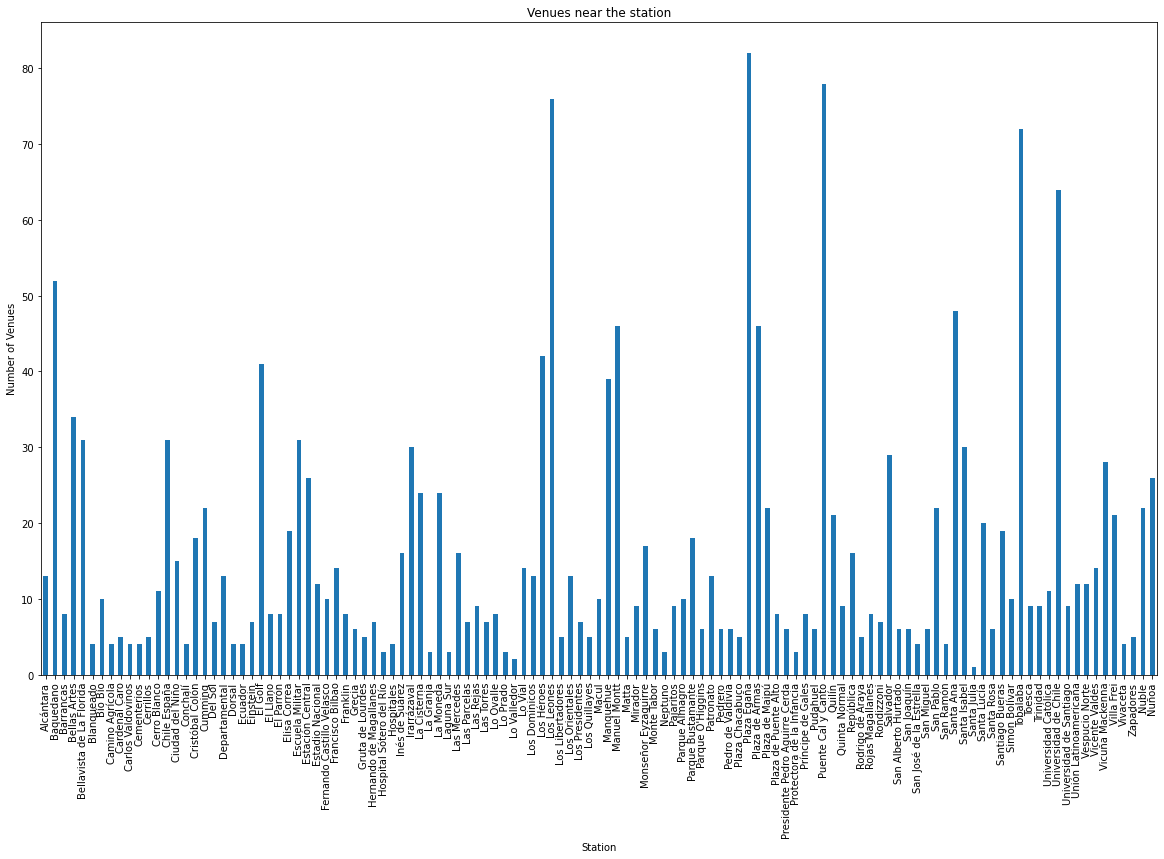

In [25]:
barra['Venue'].plot(kind='bar', figsize=(20, 12))

plt.xlabel('Station') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Venues near the station') # add title to the plot

plt.show()

In [26]:
barra['Venue'].describe()

count    119.000000
mean      15.974790
std       16.576715
min        1.000000
25%        6.000000
50%        9.000000
75%       20.500000
max       82.000000
Name: Venue, dtype: float64

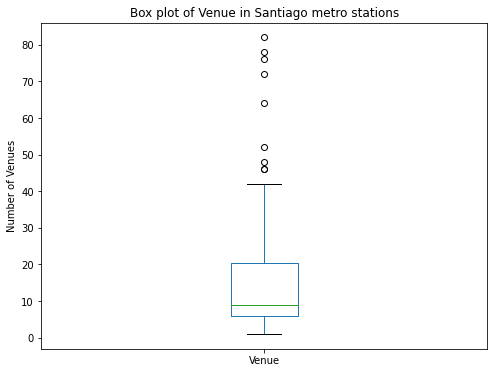

In [27]:
barra['Venue'].plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Venue in Santiago metro stations')
plt.ylabel('Number of Venues')

plt.show()

In [28]:
out=barra['Venue'].describe()[6]+(barra['Venue'].describe()[6]-barra['Venue'].describe()[4])*1.5

In [29]:
graph=graph.reset_index()
print(out)
graph

42.25


,Metro,Venue
0,Alcántara,13
1,Baquedano,52
2,Barrancas,8
3,Bellas Artes,34
4,Bellavista de La Florida,31
...,...,...
114,Villa Frei,21
115,Vivaceta,4
116,Zapadores,5
117,Ñuble,22


In [30]:
outliners=graph[graph['Venue']>out]
outliners

,Metro,Venue
1,Baquedano,52
54,Los Leones,76
61,Manuel Montt,46
75,Plaza Egaña,82
76,Plaza de Armas,46
83,Puente Cal y Canto,78
97,Santa Ana,48
104,Tobalaba,72
108,Universidad de Chile,64


In [36]:
#df_local.drop_duplicates(subset=['Metro'], inplace=True)
outloc=df_local[df_local['Metro'].isin(outliners['Metro'])].drop_duplicates(subset=['Metro'])
outloc

,Metro,Latitud,Longitud,Fecha,Distancia
12,Universidad de Chile,-33.443939,-70.651017,1977,400.0
15,Baquedano,-33.437218,-70.633390,1977,660.0
17,Manuel Montt,-33.428569,-70.619655,1980,830.0
19,Los Leones,-33.421800,-70.608566,1980,550.0
20,Tobalaba,-33.418202,-70.601495,1980,820.0
34,Puente Cal y Canto,-33.432838,-70.653077,1987,760.0
35,Santa Ana,-33.438231,-70.659909,1986,1290.0
63,Plaza de Armas,-33.437415,-70.651278,2019,570.0
72,Plaza Egaña,-33.453494,-70.570823,2019,890.0


In [33]:
graph[['Metro','Venue']].head()

,Metro,Venue
0,Alcántara,13
1,Baquedano,52
2,Barrancas,8
3,Bellas Artes,34
4,Bellavista de La Florida,31


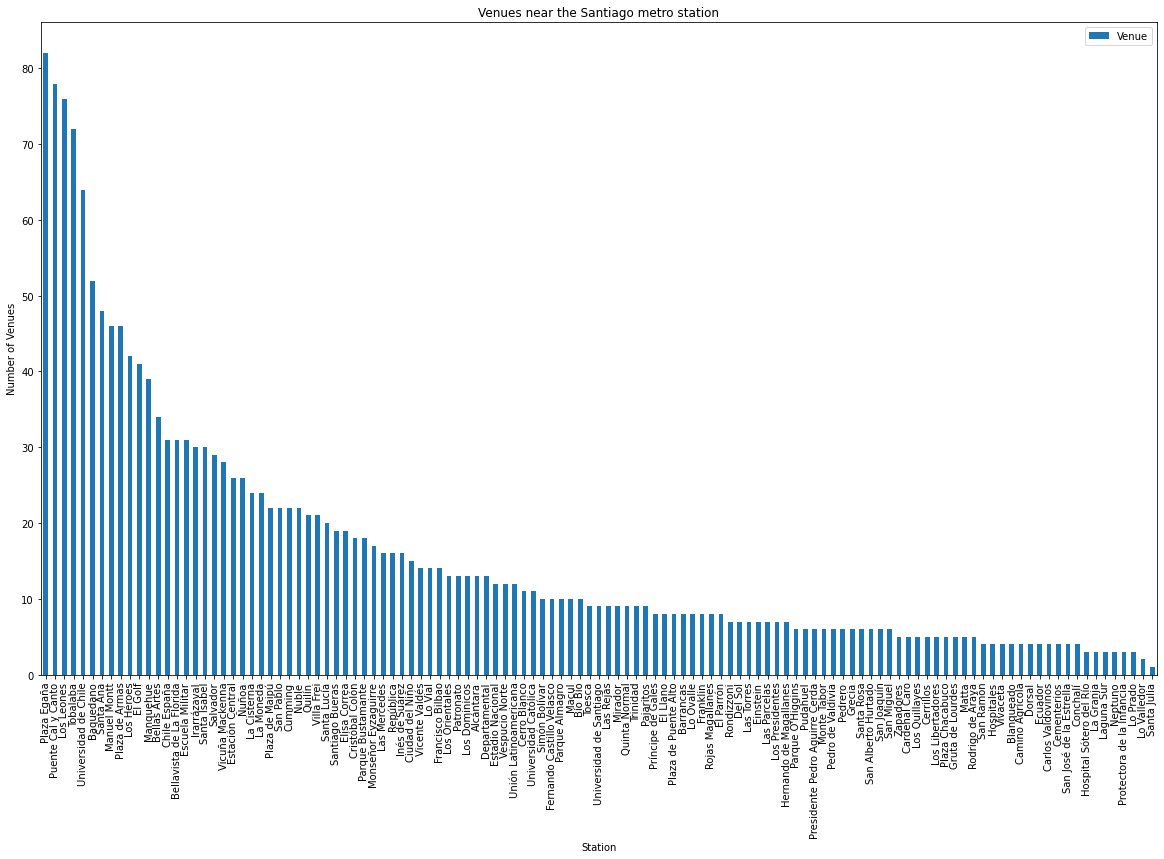

In [34]:
graph_sort=graph.sort_values(['Venue'], ascending=False, axis=0)#, inplace=True)


graph_sort.set_index('Metro').plot(kind='bar', figsize=(20, 12))

plt.xlabel('Station') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Venues near the Santiago metro station') # add title to the plot

plt.show()

In [37]:
map_STGO = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for latitud, longitud, zona in zip(outloc['Latitud'], outloc['Longitud'], outloc['Metro']):
    label = '{}'.format(zona)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitud, longitud],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_STGO)  
    
map_STGO

In [185]:
outloc.count()

Metro        10
Latitud      10
Longitud     10
Fecha        10
Distancia    10
dtype: int64

In [38]:
print('There are {} uniques categories.'.format(len(STGO_venues['Venue Category'].unique())))

There are 226 uniques categories.


##  Analyze Each Metro Station

In [39]:
# one hot encoding
STGO_onehot = pd.get_dummies(STGO_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
STGO_onehot['Metro'] = STGO_venues['Metro'] 

# move neighborhood column to the first column
fixed_columns = [STGO_onehot.columns[-1]] + list(STGO_onehot.columns[:-1])
STGO_onehot = STGO_onehot[fixed_columns]

STGO_onehot.head()

,Metro,Adult Boutique,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vineyard,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,San Pablo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,San Pablo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,San Pablo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,San Pablo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,San Pablo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
STGO_onehot.shape

(1901, 227)

In [41]:
STGO_grouped = STGO_onehot.groupby('Metro').mean().reset_index()
STGO_grouped

,Metro,Adult Boutique,American Restaurant,Amphitheater,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vineyard,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Alcántara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,Baquedano,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.038462,0.0,0.0,0.0,0.000000
2,Barrancas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
3,Bellas Artes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029412,0.058824,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.058824
4,Bellavista de La Florida,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.032258,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Villa Frei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
115,Vivaceta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
116,Zapadores,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
117,Ñuble,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [42]:
STGO_grouped.shape

(119, 227)

In [43]:
num_top_venues = 5

for hood in STGO_grouped['Metro']:
    print("----"+hood+"----")
    temp = STGO_grouped[STGO_grouped['Metro'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alcántara----
         venue  freq
0  Coffee Shop  0.31
1        Plaza  0.15
2   Restaurant  0.15
3  Music Venue  0.08
4       Temple  0.08


----Baquedano----
                       venue  freq
0                      Plaza  0.12
1             Sandwich Place  0.12
2                Coffee Shop  0.08
3  Latin American Restaurant  0.04
4                        Bar  0.04


----Barrancas----
           venue  freq
0    Bus Station  0.38
1  Metro Station  0.12
2      Speakeasy  0.12
3    Pizza Place  0.12
4           Food  0.12


----Bellas Artes----
         venue  freq
0  Coffee Shop  0.09
1        Hotel  0.09
2  Yoga Studio  0.06
3  Pizza Place  0.06
4   Art Museum  0.06


----Bellavista de La Florida----
                 venue  freq
0       Cosmetics Shop  0.06
1       Ice Cream Shop  0.06
2  Sporting Goods Shop  0.06
3    Electronics Store  0.06
4               Bakery  0.06


----Blanqueado----
                 venue  freq
0          Bus Station  0.50
1     Asian Restaurant  0.25
2 

                venue  freq
0            Pharmacy  0.38
1  Chinese Restaurant  0.25
2    Sushi Restaurant  0.12
3         Bus Station  0.12
4       Shopping Mall  0.12


----Lo Prado----
                   venue  freq
0     Light Rail Station  0.33
1          Metro Station  0.33
2  Performing Arts Venue  0.33
3         Adult Boutique  0.00
4    Peruvian Restaurant  0.00


----Lo Valledor----
                 venue  freq
0        Metro Station   0.5
1        Train Station   0.5
2       Adult Boutique   0.0
3  Peruvian Restaurant   0.0
4         Neighborhood   0.0


----Lo Vial----
                 venue  freq
0     Sushi Restaurant  0.14
1           Restaurant  0.14
2  Fried Chicken Joint  0.07
3  Peruvian Restaurant  0.07
4               Office  0.07


----Los Dominicos----
                  venue  freq
0              Pharmacy  0.15
1         Grocery Store  0.08
2              Platform  0.08
3       Motorcycle Shop  0.08
4  Other Great Outdoors  0.08


----Los Héroes----
              

                                      venue  freq
0                            Sandwich Place  0.15
1                                      Café  0.10
2                               Coffee Shop  0.10
3  Residential Building (Apartment / Condo)  0.05
4                          Sushi Restaurant  0.05


----Santa Rosa----
                   venue  freq
0            Bus Station  0.50
1                 Bakery  0.17
2          Metro Station  0.17
3  Performing Arts Venue  0.17
4            Music Venue  0.00


----Santiago Bueras----
                venue  freq
0  Chinese Restaurant  0.16
1          Restaurant  0.05
2              Bakery  0.05
3               Diner  0.05
4      Sandwich Place  0.05


----Simón Bolívar----
                 venue  freq
0       Sandwich Place   0.3
1         Dessert Shop   0.1
2   Seafood Restaurant   0.1
3  Japanese Restaurant   0.1
4            Multiplex   0.1


----Tobalaba----
           venue  freq
0     Restaurant  0.08
1    Coffee Shop  0.08
2  Deli / Bod

## Including the venues in the dataframe

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [148]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Metro']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Metro'] = STGO_grouped['Metro']

for ind in np.arange(STGO_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(STGO_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Metro,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alcántara,Coffee Shop,Plaza,Restaurant,Music Venue,Cosmetics Shop,Lawyer,Café,Temple,Football Stadium,Food Truck
1,Baquedano,Plaza,Sandwich Place,Coffee Shop,Convenience Store,Theater,Pizza Place,Event Space,Farmers Market,Ski Area,Snack Place
2,Barrancas,Bus Station,Food,Pizza Place,Metro Station,Basketball Court,Speakeasy,Yoga Studio,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant
3,Bellas Artes,Hotel,Coffee Shop,Yoga Studio,Hostel,Art Museum,Pizza Place,Café,Theater,Bookstore,Spa
4,Bellavista de La Florida,Bakery,Ice Cream Shop,Pharmacy,Electronics Store,Cosmetics Shop,Sporting Goods Shop,Board Shop,Nightclub,Beer Garden,Music Store


## Clustering

In [46]:
#Selecting the value for k the clustering

Sum_of_squared_distances = []
STGO_grouped_clustering = STGO_grouped.drop('Metro', 1)
K = range(1,119)
for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(STGO_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

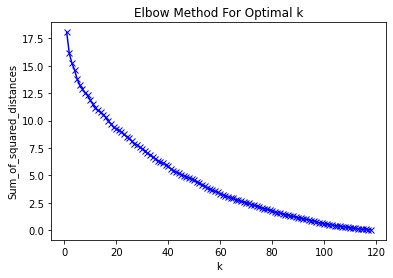

In [47]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### There is no a clear elbow, so it is necessary use the silhouette method

In [48]:
sil = []
K = range(2,119)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in K:
  km1 = KMeans(n_clusters=k, random_state=0).fit(STGO_grouped_clustering)
  labels = km1.labels_
  sil.append(silhouette_score(STGO_grouped_clustering, labels, metric = 'euclidean'))

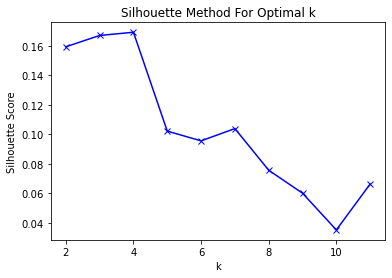

In [49]:
plt.plot(K[:10], sil[:10], 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

#### Select the second maximun value k=4

In [146]:
# set number of clusters

kclusters = 4

STGO_grouped_clustering = STGO_grouped.drop('Metro', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(STGO_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 1, 2, 2, 1, 2, 1, 2, 2])

In [149]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, "Cluster Labels", kmeans.labels_, allow_duplicates = False)

STGO_merged = df_local

# merge stgo_grouped with df_local to add latitude/longitude for each neighborhood
STGO_merged = STGO_merged.join(neighborhoods_venues_sorted.set_index('Metro'), on='Metro')

STGO_merged.head() # check the last columns!

,Metro,Latitud,Longitud,Fecha,Distancia,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,San Pablo,-33.444305,-70.723176,1975,NaN,2,Sushi Restaurant,Pharmacy,Convenience Store,Chinese Restaurant,Metro Station,Bakery,Wings Joint,Football Stadium,Fountain,Food Truck
1,Neptuno,-33.451467,-70.722616,1975,690.0,1,Park,Bus Station,Yoga Studio,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,Food Service
2,Pajaritos,-33.457511,-70.715460,1975,1030.0,1,Bus Station,Ice Cream Shop,Donut Shop,Fast Food Restaurant,Electronics Store,Health Food Store,Dessert Shop,French Restaurant,Fountain,Food
3,Las Rejas,-33.457580,-70.706756,1975,860.0,1,Bus Station,Pharmacy,South American Restaurant,Bakery,Burger Joint,Metro Station,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Fountain
4,Ecuador,-33.455976,-70.699716,1975,520.0,1,Snack Place,Food Truck,Bus Station,Coffee Shop,Yoga Studio,Flea Market,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium


In [52]:
# Percentage of stations in each cluster
STGO_merged.groupby('Cluster Labels').count()/STGO_merged.shape[0]*100

,Metro,Latitud,Longitud,Fecha,Distancia,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,,
0,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294
1,16.911765,16.911765,16.911765,16.911765,15.441176,16.911765,16.911765,16.911765,16.911765,16.911765,16.911765,16.911765,16.911765,16.911765,16.911765
2,81.617647,81.617647,81.617647,81.617647,78.676471,81.617647,81.617647,81.617647,81.617647,81.617647,81.617647,81.617647,81.617647,81.617647,81.617647
3,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294,0.735294


##### There is a one big cluster

In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for Latitude, Longitude, poi, cluster in zip(STGO_merged['Latitud'], STGO_merged['Longitud'], STGO_merged['Metro'], STGO_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [150]:
STGO_merged.loc[STGO_merged['Cluster Labels'] == 0, STGO_merged.columns[[0] + list(range(5, STGO_merged.shape[1]-5))]]

,Metro,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
134,Lo Valledor,0,Metro Station,Train Station,Yoga Studio,Flea Market,Frozen Yogurt Shop


In [151]:
STGO_merged.loc[STGO_merged['Cluster Labels'] == 1, STGO_merged.columns[[0] + list(range(5, STGO_merged.shape[1]-5))]]

,Metro,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Neptuno,1,Park,Bus Station,Yoga Studio,Furniture / Home Store,Fried Chicken Joint
2,Pajaritos,1,Bus Station,Ice Cream Shop,Donut Shop,Fast Food Restaurant,Electronics Store
3,Las Rejas,1,Bus Station,Pharmacy,South American Restaurant,Bakery,Burger Joint
4,Ecuador,1,Snack Place,Food Truck,Bus Station,Coffee Shop,Yoga Studio
27,Vespucio Norte,1,Bus Station,Metro Station,Internet Cafe,Pharmacy,Paper / Office Supplies Store
29,Dorsal,1,Bus Station,Stadium,Bakery,Yoga Studio,Gastropub
31,Cementerios,1,Nightclub,Restaurant,Bus Station,Metro Station,Yoga Studio
56,Los Libertadores,1,Bus Station,Metro Station,Park,Yoga Studio,Frozen Yogurt Shop
59,Conchalí,1,Cupcake Shop,Restaurant,Bus Station,Park,Flea Market
82,Los Presidentes,1,Japanese Restaurant,Bakery,Bus Station,Grocery Store,Metro Station


In [152]:
STGO_merged.loc[STGO_merged['Cluster Labels'] == 2, STGO_merged.columns[[0] + list(range(5, STGO_merged.shape[1]-5))]]

,Metro,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,San Pablo,2,Sushi Restaurant,Pharmacy,Convenience Store,Chinese Restaurant,Metro Station
5,San Alberto Hurtado,2,Pizza Place,Fried Chicken Joint,Public Art,Sushi Restaurant,Bus Station
6,Universidad de Santiago,2,Bakery,Pharmacy,Snack Place,Bus Station,Hotel
7,Estación Central,2,Pharmacy,Sandwich Place,Fast Food Restaurant,Sporting Goods Shop,Pizza Place
8,Unión Latinoamericana,2,Fried Chicken Joint,Nightclub,Toy / Game Store,Café,Asian Restaurant
...,...,...,...,...,...,...,...
137,Bío Bío,2,Flea Market,Bar,South American Restaurant,Seafood Restaurant,Café
138,Ñuble,2,Dessert Shop,Convenience Store,Metro Station,Candy Store,Park
140,Ñuñoa,2,Bakery,Jewelry Store,Restaurant,Gymnastics Gym,Chinese Restaurant
141,Inés de Suárez,2,Sandwich Place,Theater,Restaurant,Breakfast Spot,Music Store


In [153]:
STGO_merged.loc[STGO_merged['Cluster Labels'] == 0, STGO_merged.columns[[0] + list(range(5, STGO_merged.shape[1]-5))]]

,Metro,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
134,Lo Valledor,0,Metro Station,Train Station,Yoga Studio,Flea Market,Frozen Yogurt Shop


In [154]:
STGO_merged.loc[STGO_merged['Cluster Labels'] == 3, STGO_merged.columns[[0] + list(range(5, STGO_merged.shape[1]-5))]]

,Metro,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
101,Santa Julia,3,Food Court,Yoga Studio,Dance Studio,Furniture / Home Store,Frozen Yogurt Shop


In [59]:
STGO_grouped

,Metro,Adult Boutique,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Video Store,Vineyard,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Alcántara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,Baquedano,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038462,...,0.0,0.0,0.0,0.00000,0.0,0.038462,0.0,0.0,0.0,0.000000
2,Barrancas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000
3,Bellas Artes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029412,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.058824
4,Bellavista de La Florida,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.03125,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Villa Frei,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000
115,Vivaceta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000
116,Zapadores,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000
117,Ñuble,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [94]:
STGO_merged[STGO_merged[STGO_merged.columns[list(range(6, STGO_merged.shape[1]))]].apply(lambda row: row.astype(str).str.contains('Hotel').any(), axis=1)][['Metro','Cluster Labels','Longitud','Latitud']]

,Metro,Cluster Labels,Longitud,Latitud
6,Universidad de Santiago,2,-70.686569,-33.452897
9,República,0,-70.667142,-33.447721
14,Universidad Católica,0,-70.639893,-33.439765
15,Baquedano,0,-70.633390,-33.437218
16,Salvador,0,-70.626102,-33.432708
18,Pedro de Valdivia,0,-70.614483,-33.425419
19,Los Leones,0,-70.608566,-33.421800
20,Tobalaba,0,-70.601495,-33.418202
21,El Golf,0,-70.595712,-33.416617
24,Manquehue,0,-70.570332,-33.409622


In [95]:
STGO_resto=STGO_merged[STGO_merged[STGO_merged.columns[list(range(6, STGO_merged.shape[1]))]].apply(lambda row: row.astype(str).str.contains('Restaurant').any(), axis=1)][['Metro','Cluster Labels','Longitud','Latitud']]
STGO_mus=STGO_merged[STGO_merged[STGO_merged.columns[list(range(6, STGO_merged.shape[1]))]].apply(lambda row: row.astype(str).str.contains('Museum').any(), axis=1)][['Metro','Cluster Labels','Longitud','Latitud']]
STGO_art=STGO_merged[STGO_merged[STGO_merged.columns[list(range(6, STGO_merged.shape[1]))]].apply(lambda row: row.astype(str).str.contains('Art').any(), axis=1)][['Metro','Cluster Labels','Longitud','Latitud']]
STGO_hot=STGO_merged[STGO_merged[STGO_merged.columns[list(range(6, STGO_merged.shape[1]))]].apply(lambda row: row.astype(str).str.contains('Hotel').any(), axis=1)][['Metro','Cluster Labels','Longitud','Latitud']]

In [93]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for Latitude, Longitude, poi, cluster in zip(STGO_resto['Latitud'], STGO_resto['Longitud'], STGO_resto['Metro'], STGO_resto['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [90]:
STGO_int=STGO_art.append(STGO_mus)
STGO_int.drop_duplicates(subset=['Metro'], inplace=True)
STGO_int

,Metro,Cluster Labels,Longitud,Latitud
5,San Alberto Hurtado,1,-70.692276,-33.454216
10,Los Héroes,0,-70.660446,-33.446185
11,La Moneda,0,-70.654855,-33.444906
14,Universidad Católica,0,-70.639893,-33.439765
18,Pedro de Valdivia,0,-70.614483,-33.425419
99,Santa Rosa,1,-70.634112,-33.542419
100,La Granja,0,-70.616111,-33.541111
112,Lo Prado,0,-70.716828,-33.443161
119,Bellas Artes,0,-70.644131,-33.436619
121,Parque Bustamante,0,-70.631932,-33.442802


In [91]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for Latitude, Longitude, poi, cluster in zip(STGO_int['Latitud'], STGO_int['Longitud'], STGO_int['Metro'], STGO_int['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [96]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for Latitude, Longitude, poi, cluster in zip(STGO_hot['Latitud'], STGO_hot['Longitud'], STGO_hot['Metro'], STGO_hot['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [160]:
outclu=STGO_merged[STGO_merged['Metro'].isin(outliners['Metro'])].drop_duplicates(subset=['Metro'])
outclu[STGO_merged.columns[[0] + list(range(5, STGO_merged.shape[1]))]]

,Metro,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Universidad de Chile,2,Bookstore,Coffee Shop,Restaurant,Gym,Theater,Dessert Shop,Chinese Restaurant,Memorial Site,Mediterranean Restaurant,Sandwich Place
15,Baquedano,2,Plaza,Sandwich Place,Coffee Shop,Convenience Store,Theater,Pizza Place,Event Space,Farmers Market,Ski Area,Snack Place
17,Manuel Montt,2,Pizza Place,Café,Restaurant,Coffee Shop,Deli / Bodega,Bar,French Restaurant,Burger Joint,School,Sandwich Place
19,Los Leones,2,Hotel,Coffee Shop,French Restaurant,Café,Clothing Store,Chinese Restaurant,Tattoo Parlor,Record Shop,Gourmet Shop,Restaurant
20,Tobalaba,2,Coffee Shop,Restaurant,Pharmacy,Deli / Bodega,Hotel,Bakery,Dessert Shop,Diner,Indian Restaurant,Electronics Store
34,Puente Cal y Canto,2,Seafood Restaurant,Peruvian Restaurant,Latin American Restaurant,Flower Shop,Farmers Market,Bar,Camera Store,Greek Restaurant,Boutique,Food
35,Santa Ana,2,Japanese Restaurant,Coffee Shop,Restaurant,Yoga Studio,Dance Studio,Breakfast Spot,Burger Joint,Cafeteria,Café,Deli / Bodega
63,Plaza de Armas,2,Coffee Shop,Peruvian Restaurant,Sandwich Place,History Museum,Fast Food Restaurant,Breakfast Spot,Boutique,Café,Cantonese Restaurant,Salad Place
72,Plaza Egaña,2,Coffee Shop,Multiplex,Electronics Store,Fast Food Restaurant,Italian Restaurant,Clothing Store,Bakery,Café,Bike Rental / Bike Share,Bookstore


In [159]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for Latitude, Longitude, poi, cluster in zip(outclu['Latitud'], outclu['Longitud'], outclu['Metro'], outclu['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters